# Enterprise - Monte Carlo Analysis


## Environment class
Defining the environment variables of the simulation:  
- latitude/longitude
- elevation
- wind speed/direction
- date (for forecast tool)

In [ ]:
import datetime

from rocketpy import Environment

env = Environment(latitude=42.7033004, longitude=-77.1915894, elevation=2333)

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

env.set_atmospheric_model(
    type="Forecast", file="GFS"  # "custom_atmosphere", wind_v, wind_u
)


Gravity Details

Acceleration of gravity at surface level:    9.8030 m/s²
Acceleration of gravity at  79.176 km (ASL): 9.5643 m/s²


Launch Site Details

Launch Date: 2025-03-10 12:00:00 UTC
Launch Site Latitude: 42.69262°
Launch Site Longitude: -77.18899°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 320688.66 W    4729005.30 N
Launch Site UTM zone: 17T
Launch Site Surface Elevation: 344.6 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.176 km
Forecast Time Period: from 2025-03-09 06:00:00 to 2025-03-25 06:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 3.84 m/s
Surface Wind Direction: 264.89°
Surface Wind Heading: 84.89°
Surface Pressure: 969.42 hPa
Surface Temperature: 274.81 K
Surface Air Density: 1.229 kg/m³
Surface Speed of Sound: 332.32 m/s


Earth Model Details

Earth Radius at Launch si

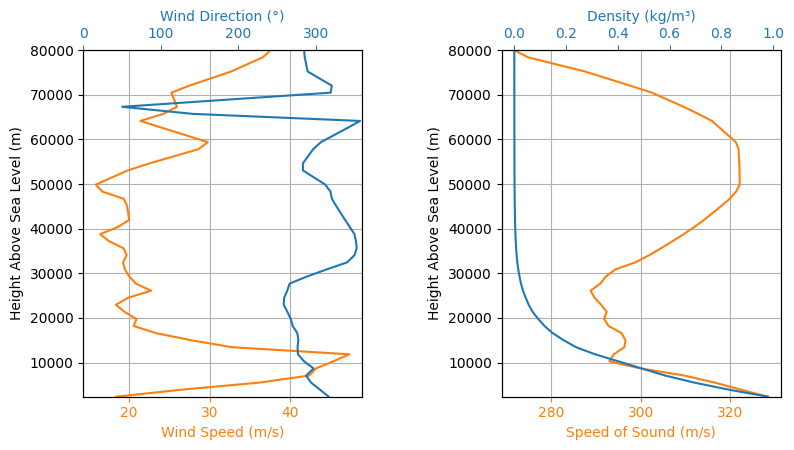

In [2]:
env.info()

## Motor class
Defining motor parameters, including:
- thrust curve (`.csv`)

In [3]:
from rocketpy.motors import SolidMotor

solid_motor = SolidMotor(
    thrust_source="Curves/enterprise_thrust.csv",
    dry_mass=4.559,
    dry_inertia=(0.0996, 0.0996, 0.00307),
    nozzle_radius=0.0397,
    grain_number=1,
    grain_density=1807,
    grain_outer_radius=0.0397,
    grain_initial_inner_radius=0.0381,
    grain_initial_height=0.508,
    grain_separation=0,
    grains_center_of_mass_position=0.52,
    center_of_dry_mass_position=1.33,
    nozzle_position=2.22,
    # burn_time=2.764,
    throat_radius=0.0397,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Nozzle Details
Nozzle Radius: 0.0397 m
Nozzle Throat Radius: 0.0397 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1807 kg/m3
Grain Outer Radius: 0.0397 m
Grain Inner Radius: 0.0381 m
Grain Height: 0.508 m
Grain Volume: 0.000 m3
Grain Mass: 0.359 kg

Motor Details
Total Burning Time: 2.754 s
Total Propellant Mass: 0.359 kg
Structural Mass Ratio: 0.927
Average Propellant Exhaust Velocity: 15386.901 m/s
Average Thrust: 2005.666 N
Maximum Thrust: 2547.501 N at 0.08 s after ignition.
Total Impulse: 5523.603 Ns



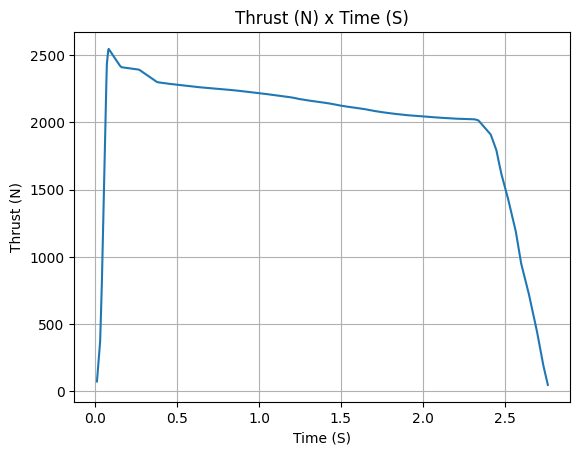

In [4]:
solid_motor.info()

## Rocket class
Defining rocket parameters and adding aerosurfaces:
- rocket body
- rocket nose cone
- rocket fins
- rocket tail
- parachutes
- sensors (possibly)

In [5]:
from rocketpy import Rocket

rocket = Rocket(
    radius=15.7 / 200,
    mass=18.2,  # rocket's mass without the motor in kg
    inertia=(
        7.503,
        7.503,
        0.05608,
    ),  # in relation to the rocket's center of mass without motor
    power_off_drag="Curves/enterprise_drag.csv",
    power_on_drag="Curves/enterprise_drag.csv",
    center_of_mass_without_motor=1.34,
    coordinate_system_orientation="tail_to_nose",
)

In [6]:
motor = solid_motor

rocket.add_motor(motor, position = 0.012)

rail_buttons = rocket.set_rail_buttons(
    upper_button_position=0.61,
    lower_button_position=0.00,
    angular_position=180,
)

nose_cone = rocket.add_nose(length=0.657, kind="von karman", position=2.22)

fin_set = rocket.add_trapezoidal_fins(
    n=3,
    root_chord=0.41,
    tip_chord=0.05,
    span=0.165,
    cant_angle=0.0,
    # airfoil=("Airfoils/Airfoil.csv", "radians"),
    position=0.45,
    sweep_length=0.354,
    # sweep_angle=57.9,
)

tail = rocket.add_tail(
    top_radius=0.0785, bottom_radius=0.04635, length=0.0356, position=0.03
)

main = rocket.add_parachute(
    name="main",
    cd_s=2.200,
    trigger=305,  # ejection altitude in meters
    sampling_rate=105,
    lag=0,
    noise=(0, 8.3, 0.5),
)

drogue = rocket.add_parachute(
    name="drogue",
    cd_s=0.800,
    trigger="apogee",  # ejection at apogee
    sampling_rate=105,
    lag=0,
    noise=(0, 8.3, 0.5),
)

In [7]:
rocket.info()


Inertia Details

Rocket Mass: 18.200 kg (without motor)
Rocket Dry Mass: 22.759 kg (with unloaded motor)
Rocket Loaded Mass: 23.118 kg
Rocket Structural Mass Ratio: 0.984
Rocket Inertia (with unloaded motor) 11: 7.603 kg*m2
Rocket Inertia (with unloaded motor) 22: 7.603 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.059 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0785 m
Rocket Frontal Area: 0.019359 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 0.892 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.808 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.013 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 7.170/rad
Tail Lift Coefficient De

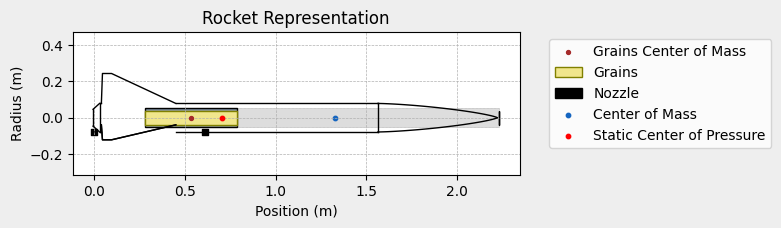

In [8]:
rocket.draw()

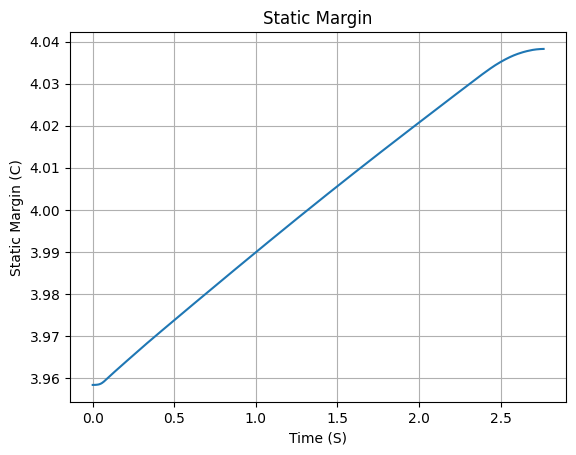

In [9]:
rocket.plots.static_margin()

## Flight class
Runs and stores the simulation

In [10]:
from rocketpy import Flight

test_flight = Flight(
    rocket=rocket,
    environment=env,
    rail_length=4,  # metres
    inclination=90,  # degrees
    heading=0,  # degrees
)

In [11]:
test_flight.info()


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 344.64 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.000 | e1: 0.000 | e2: 0.000 | e3: 1.000
Euler Angles - Spin φ : 270.00° | Nutation θ: 0.00° | Precession ψ: -90.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 3.958 c


Surface Wind Conditions

Frontal Surface Wind Speed: 0.17 m/s
Lateral Surface Wind Speed: -3.81 m/s


Launch Rail

Launch Rail Length: 4 m
Launch Rail Inclination: 90.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.271 s
Rail Departure Velocity: 21.187 m/s
Rail Departure Stability Margin: 3.968 c
Rail Departure Angle of Attack: 10.336°
Rail Departure Thrust-Weight Ratio: 10.548
Rail Departure Reynolds Number: 2.409e+05


Burn out State

Burn out time: 2.764 s
Altitude at burn out: 656.823 m (ASL) | 312.183 m (AGL)
Rocket speed at burn out: 204.938 m/s
Freestream veloci

In [12]:
test_flight.export_kml("trajectory.kml")

File  trajectory.kml  saved with success!


## Stochastic classes
Builds stochastic objects with built in errors/variations

In [13]:
from rocketpy.simulation import MonteCarlo
from rocketpy.stochastic import (
    StochasticEnvironment,
    StochasticSolidMotor,
    StochasticRocket,
    StochasticFlight,
    StochasticNoseCone,
    StochasticTail,
    StochasticTrapezoidalFins,
    StochasticParachute,
    StochasticRailButtons,
)

""" All stochastics values can be lists of possible values or have the form of:
(nominal value[optional], standard deviation, distribution type[optional])
type = “normal”, “binomial”, “chisquare”, “exponential”, “gamma”, “gumbel”, “laplace”, “logistic”, “poisson”, “uniform”, and “wald” """

stochastic_env = StochasticEnvironment(
    environment=env,
    longitude=0.01,
    latitude=0.01,
)

stochastic_motor = StochasticSolidMotor(
    solid_motor=solid_motor,
    burn_start_time=(0, 0.1, "binomial"),
    total_impulse=100,
    nozzle_radius=0.0001,
    nozzle_position=0.01,
)

stochastic_rocket = StochasticRocket(
    rocket=rocket,
    radius=0.0001,
    mass=(0.5, "normal"),
    inertia_11=0.1,
    inertia_22=0.1,
    inertia_33=0.001,
    center_of_mass_without_motor=0,
)

stochastic_rail_buttons = StochasticRailButtons(
    rail_buttons=rail_buttons, buttons_distance=0.01
)

stochastic_nose_cone = StochasticNoseCone(
    nosecone=nose_cone, length=0.001
)

stochastic_fin_set = StochasticTrapezoidalFins(
    trapezoidal_fins=fin_set,
    root_chord=0.01,
    tip_chord=0.01,
    span=0.001,
)

stochastic_tail = StochasticTail(
    tail=tail, top_radius=0.0001, bottom_radius=0.0001, length=0.0001
)

stochastic_main = StochasticParachute(parachute=main, cd_s=0.1, lag=0)

stochastic_drogue = StochasticParachute(
    parachute=drogue, cd_s=0.07, lag=0
)

stochastic_rocket.add_motor(stochastic_motor, position=0.001)

stochastic_rocket.set_rail_buttons(
    stochastic_rail_buttons, lower_button_position=(0.01, "normal")
)

stochastic_rocket.add_nose(stochastic_nose_cone, position=0.01)

stochastic_rocket.add_trapezoidal_fins(stochastic_fin_set, position=(0.01, "normal"))

stochastic_rocket.add_tail(stochastic_tail)

stochastic_rocket.add_parachute(stochastic_main)

stochastic_rocket.add_parachute(stochastic_drogue)

stochastic_flight = StochasticFlight(
    flight=test_flight,
    inclination=(88, 1),  # mean= 88, std=1
    heading=(0, 2),  # mean= 0, std=2
)

test_dispersion = MonteCarlo(
    filename="Monte_Carlo_results/monte_carlos_analysis_results",
    environment=stochastic_env,
    rocket=stochastic_rocket,
    flight=stochastic_flight,
)

C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\rocketpy\simulation\monte_carlo.py:133: UserWarning: This class is still under testing and some attributes may be changed in next versions
  warnings.warn(


In [14]:
stochastic_env.visualize_attributes()

Reporting the attributes of the `StochasticEnvironment` object:

Constant Attributes:
	datum                    SIRGAS2000
	elevation                344.6397705078125
	gravity                  Function from R1 to R1 : (height (m)) → (gravity (m/s²))
	timezone                 UTC

Stochastic Attributes:
	latitude                 42.69262 ± 0.01000 (normal)
	longitude                -77.18899 ± 0.01000 (normal)
	wind_velocity_x_factor   1.00000 ± 0.00000 (normal)
	wind_velocity_y_factor   1.00000 ± 0.00000 (normal)


In [15]:
stochastic_motor.visualize_attributes()

Reporting the attributes of the `StochasticSolidMotor` object:

Constant Attributes:
	burn_out_time                    2.764
	center_of_dry_mass_position      1.33
	coordinate_system_orientation    nozzle_to_combustion_chamber
	dry_I_11                         0.0996
	dry_I_12                         0
	dry_I_13                         0
	dry_I_22                         0.0996
	dry_I_23                         0
	dry_I_33                         0.00307
	dry_mass                         4.559
	grain_density                    1807
	grain_initial_height             0.508
	grain_initial_inner_radius       0.0381
	grain_number                     1
	grain_outer_radius               0.0397
	grain_separation                 0
	grains_center_of_mass_position   0.52
	interpolate                      linear
	throat_radius                    0.0397
	thrust_source                    Curves/enterprise_thrust.csv

Stochastic Attributes:
	burn_start_time                  0.00000 ± 0.10000 (binomia

In [16]:
stochastic_rocket.visualize_attributes()

Reporting the attributes of the `StochasticRocket` object:

Constant Attributes:
	I_12_without_motor              0
	I_13_without_motor              0
	I_23_without_motor              0
	coordinate_system_orientation   tail_to_nose
	power_off_drag                  Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power Off)
	power_on_drag                   Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power On)

Stochastic Attributes:
	I_11_without_motor              7.50300 ± 0.10000 (normal)
	I_22_without_motor              7.50300 ± 0.10000 (normal)
	I_33_without_motor              0.05608 ± 0.00100 (normal)
	center_of_mass_without_motor    1.34000 ± 0.00000 (normal)
	mass                            18.20000 ± 0.50000 (normal)
	power_off_drag_factor           1.00000 ± 0.00000 (normal)
	power_on_drag_factor            1.00000 ± 0.00000 (normal)
	radius                          0.07850 ± 0.00010 (normal)


In [17]:
stochastic_flight.visualize_attributes()

Reporting the attributes of the `StochasticFlight` object:

Constant Attributes:
	rail_length           4

Stochastic Attributes:
	heading               0.00000 ± 2.00000 (normal)
	inclination           88.00000 ± 1.00000 (normal)


## Monte Carlo simulation
Runs the simulations while iterating the stochastic objects:
- number of simulations: the number of total simulations in the output file
- append: overwrites or appends to current outputs; default -> `True`

In [18]:
test_dispersion.simulate(number_of_simulations=10, append=True)

Completed 10 iterations. Total CPU time: 4.7 s. Total wall time: 4.8 smated time left: 0 s
Saving results.    
Results saved to Monte_Carlo_results/monte_carlos_analysis_results.outputs.txt


In [19]:
test_dispersion.set_results()

In [20]:
test_dispersion.set_processed_results()

## Monte Carlo results
Summary of Monte Carlo results and plots

In [21]:
test_dispersion.prints.all()

Monte Carlo Simulation by RocketPy
Data Source:  Monte_Carlo_results/monte_carlos_analysis_results
Number of simulations:  10
Results: 

                Parameter            Mean          Median       Std. Dev.    95% PI Lower    95% PI Upper
--------------------------------------------------------------------------------------------------------------
         out_of_rail_time           0.259           0.261           0.004           0.252           0.262
              apogee_time          20.213          20.105           0.280          19.888          20.700
 initial_stability_margin           3.945           3.977           0.088           3.802           4.037
          impact_velocity         -12.789         -12.792           0.253         -13.190         -12.423
          max_mach_number           0.637           0.629           0.017           0.617           0.667
     out_of_rail_velocity          21.388          21.334           0.276          20.986          21.804
          

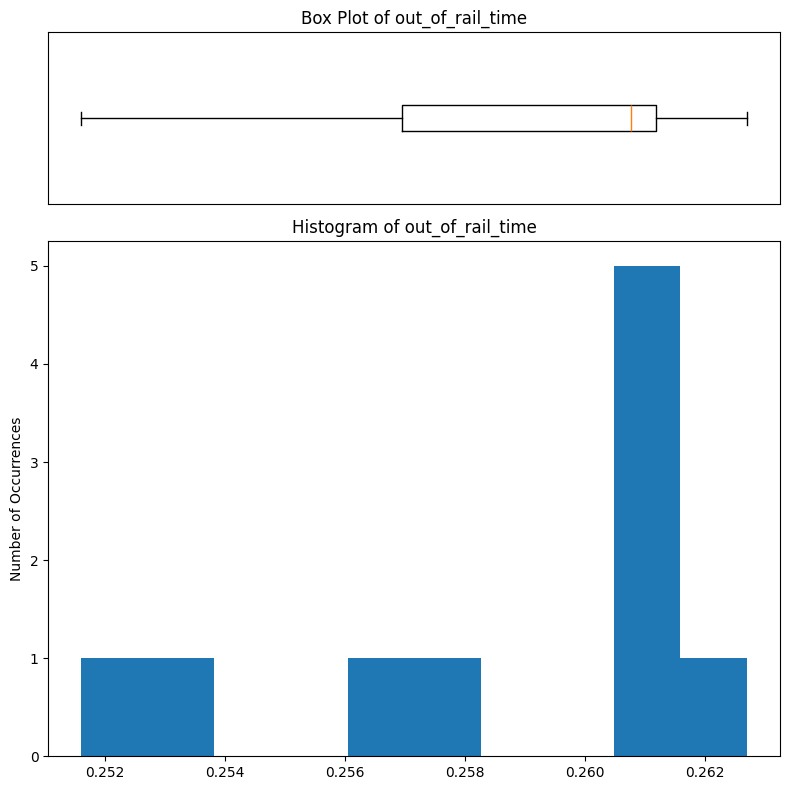

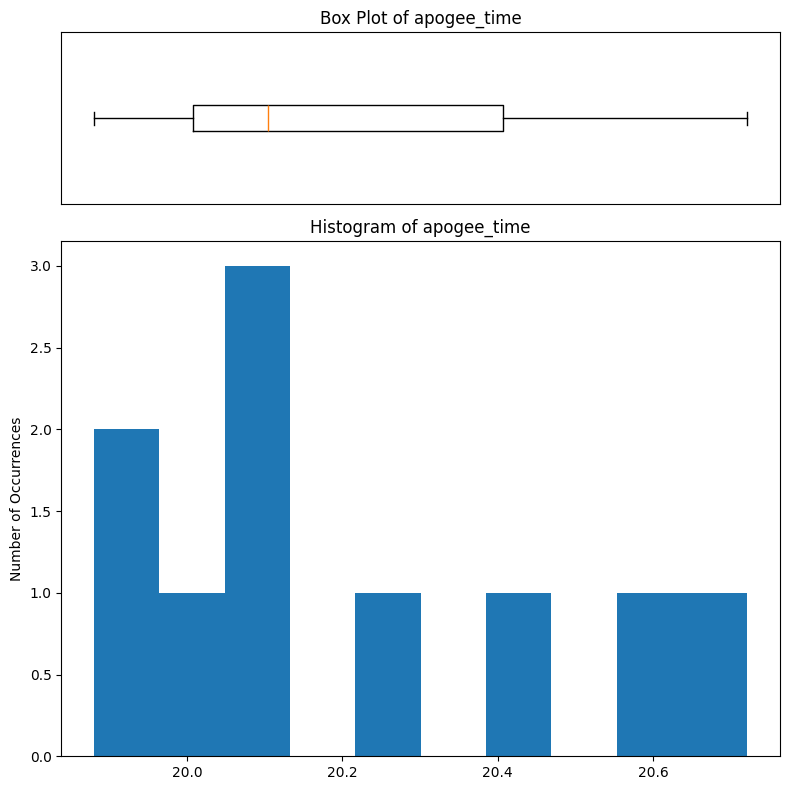

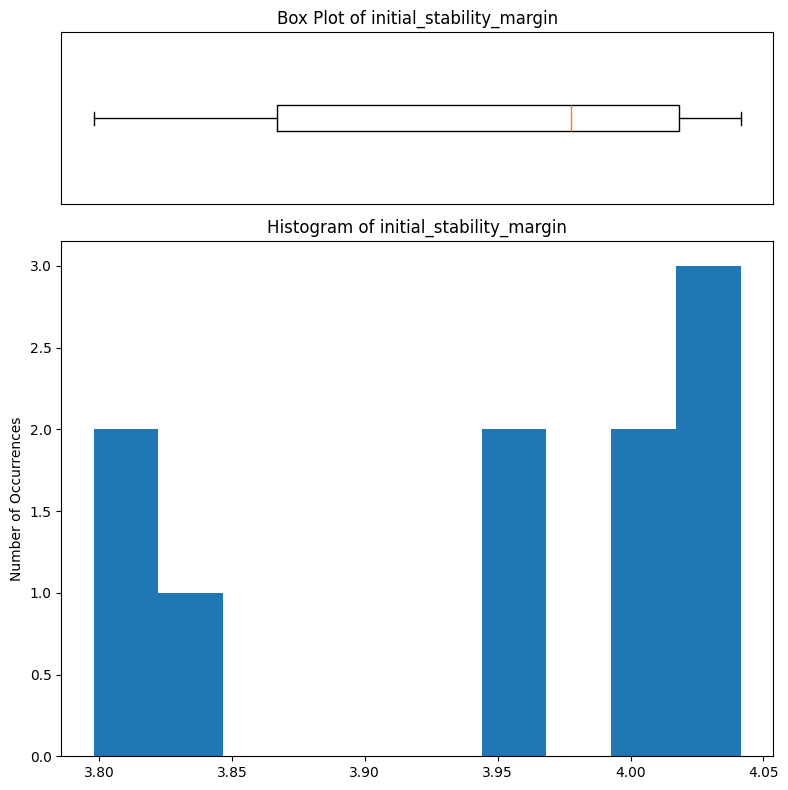

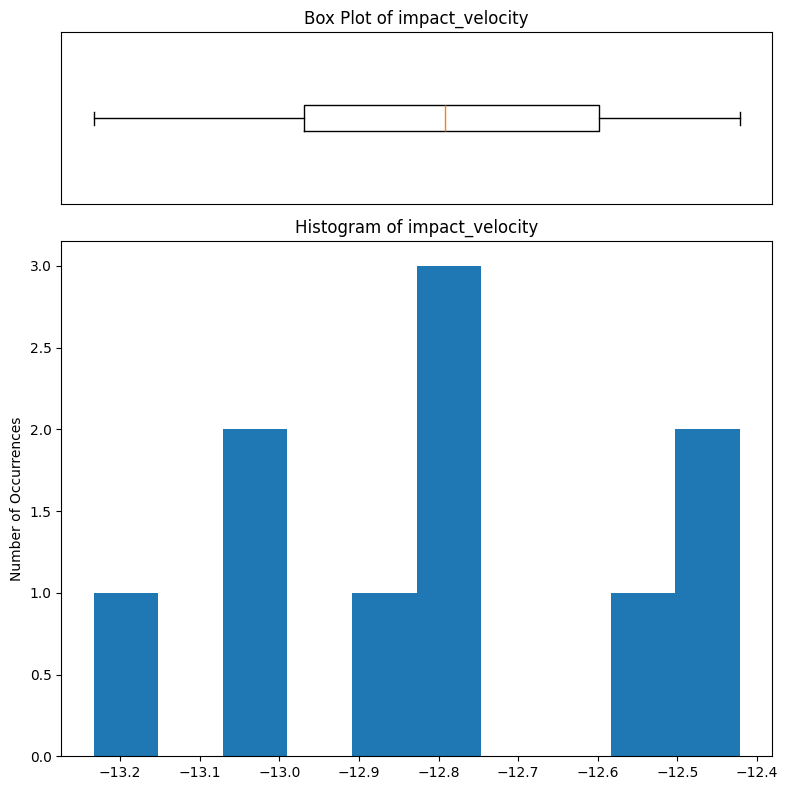

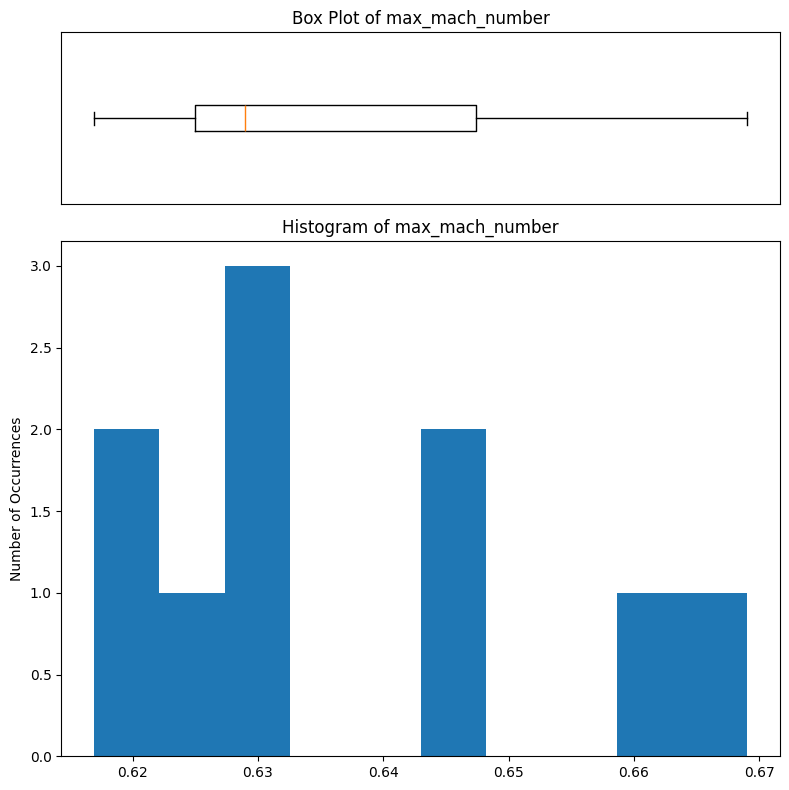

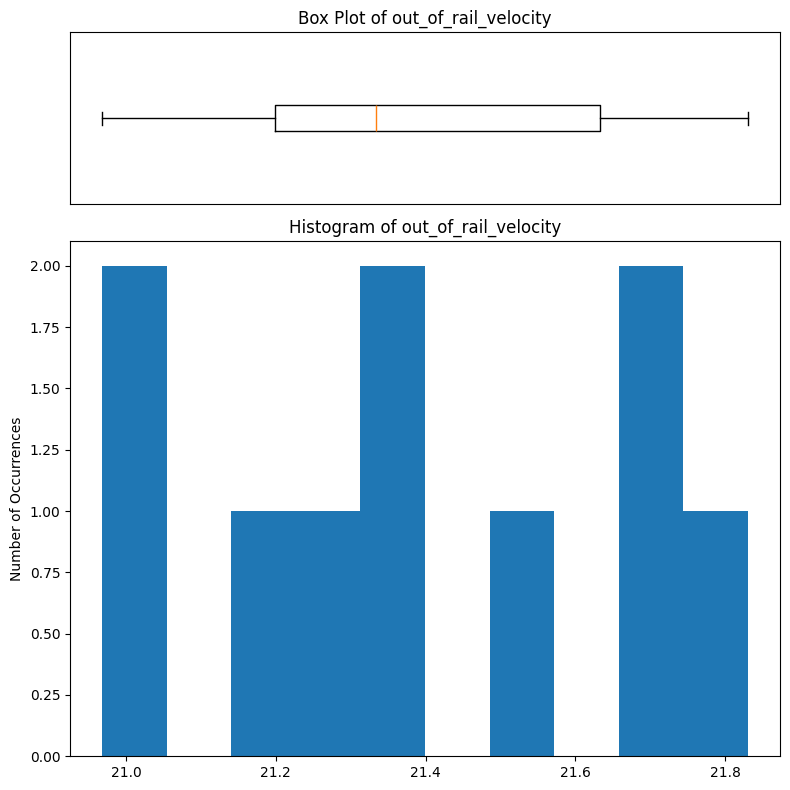

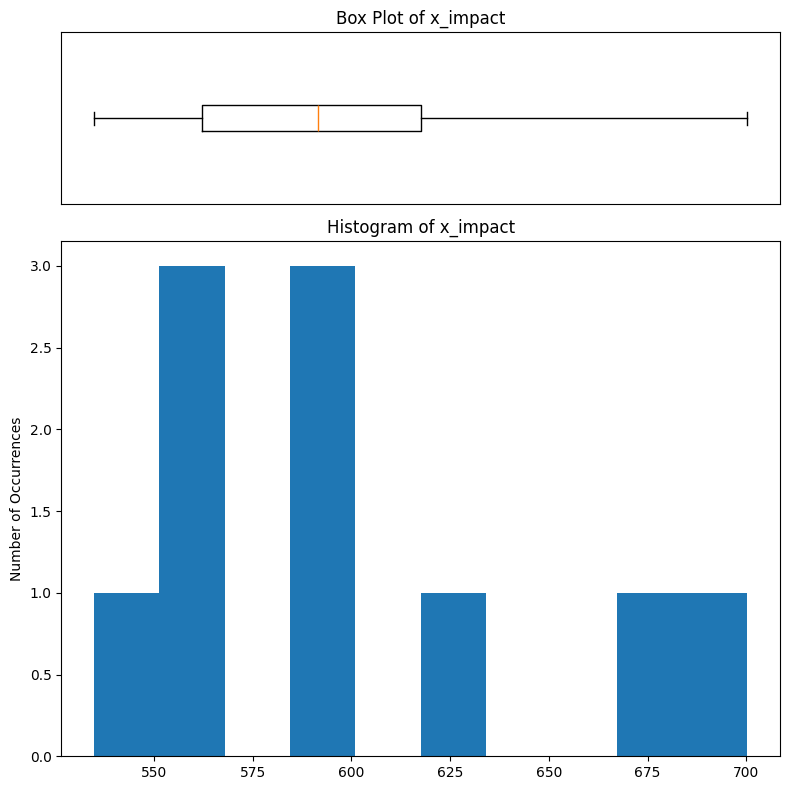

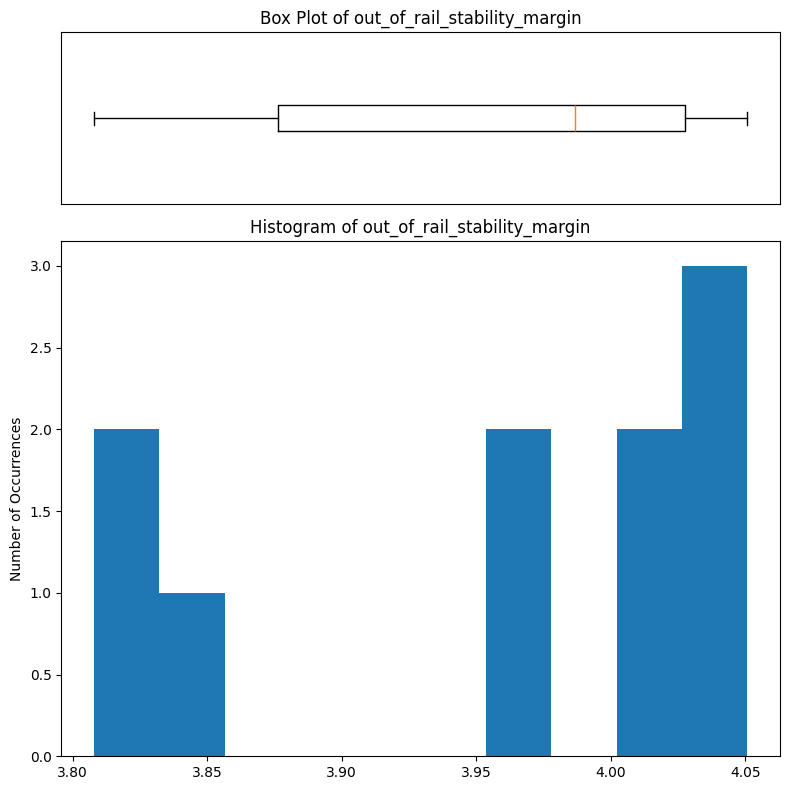

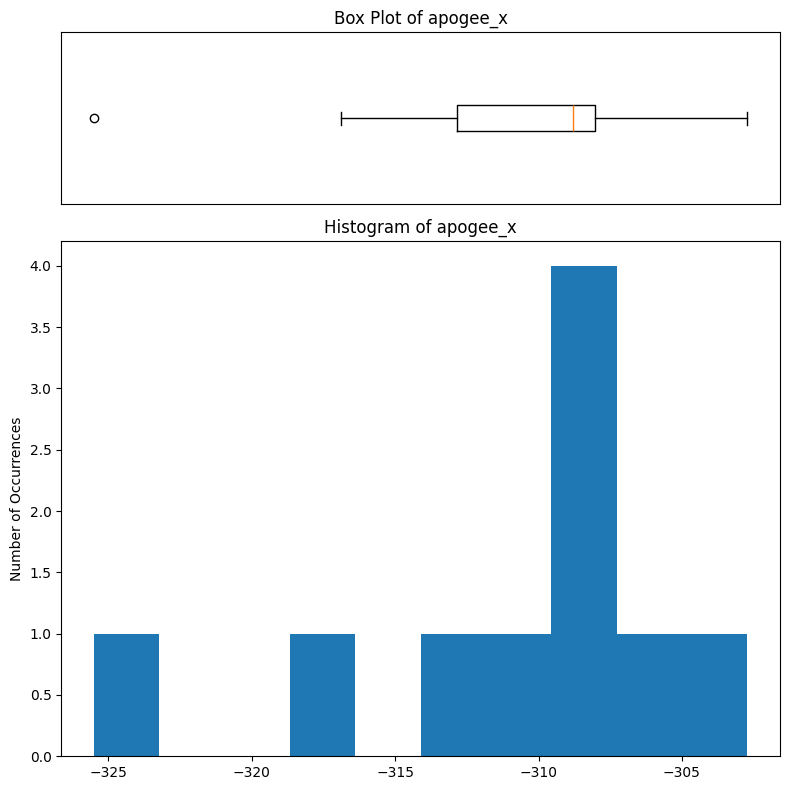

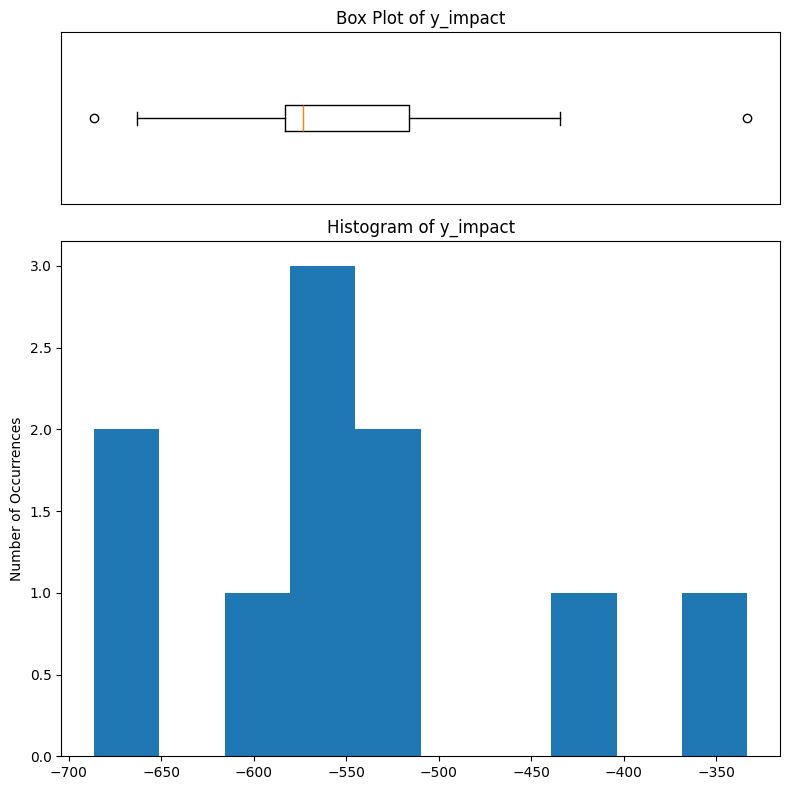

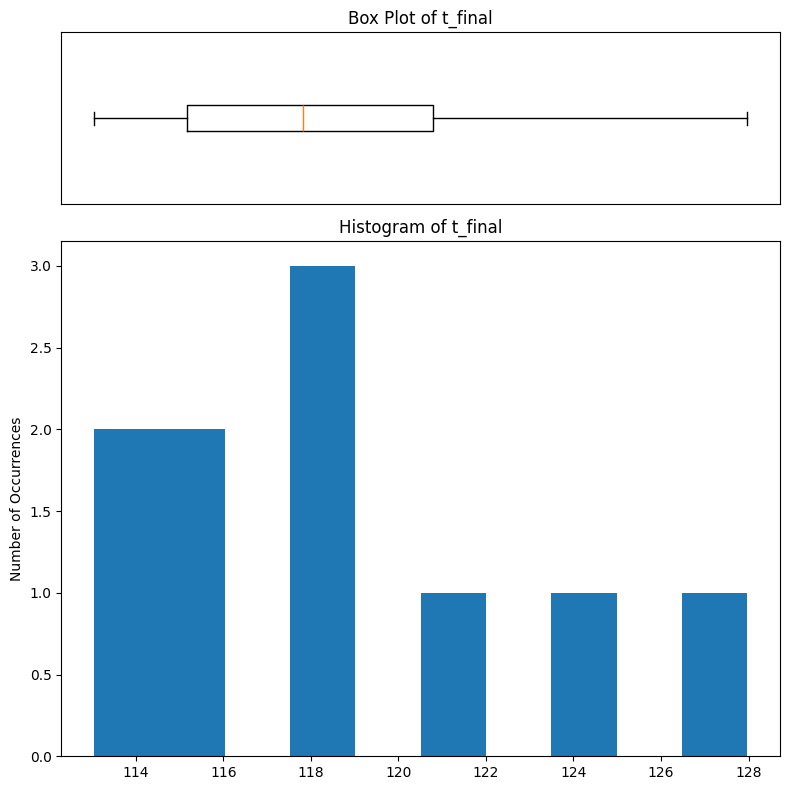

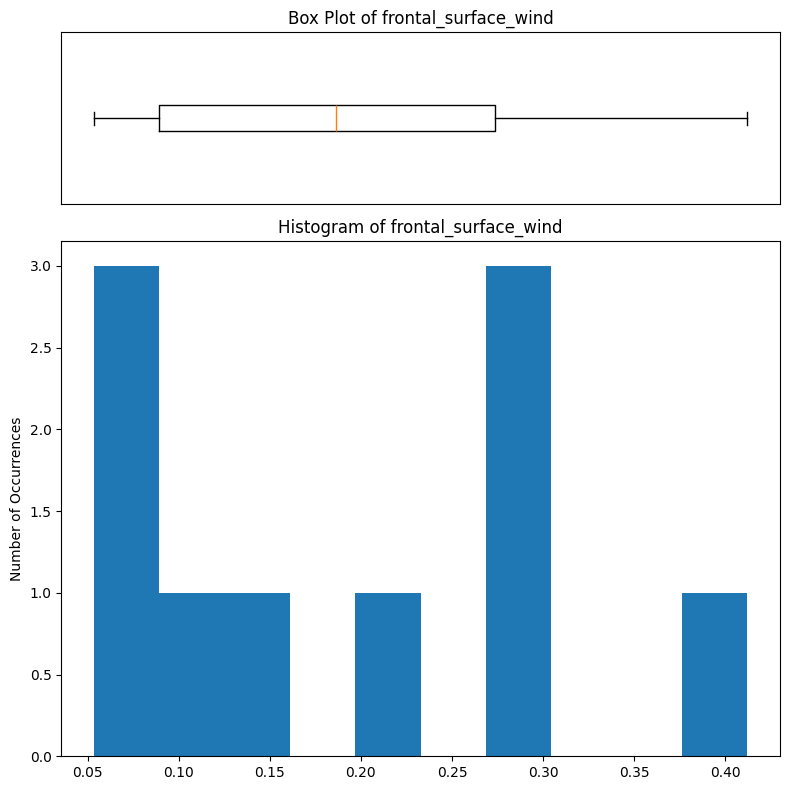

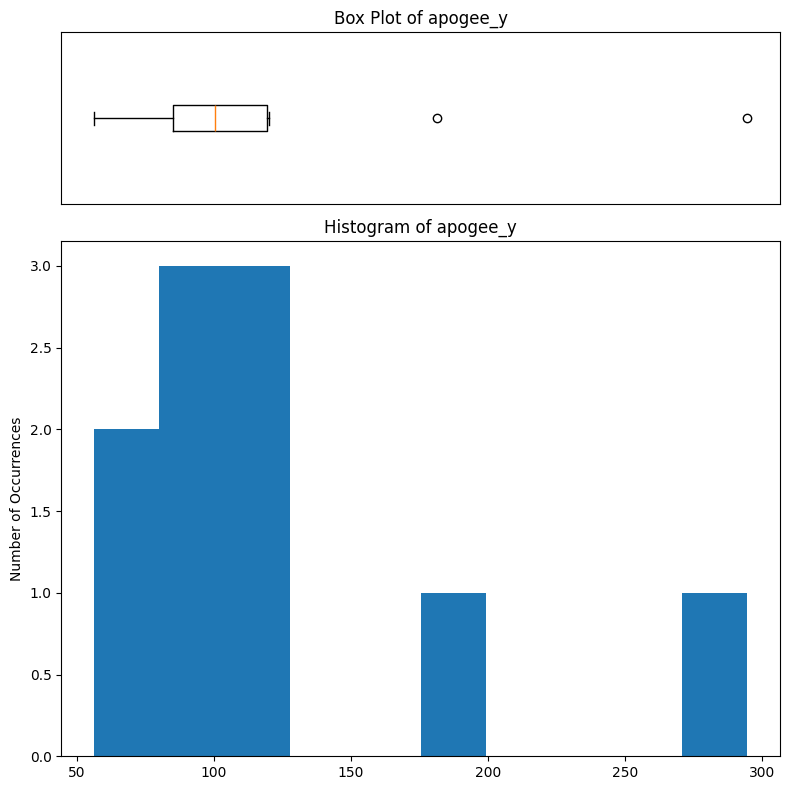

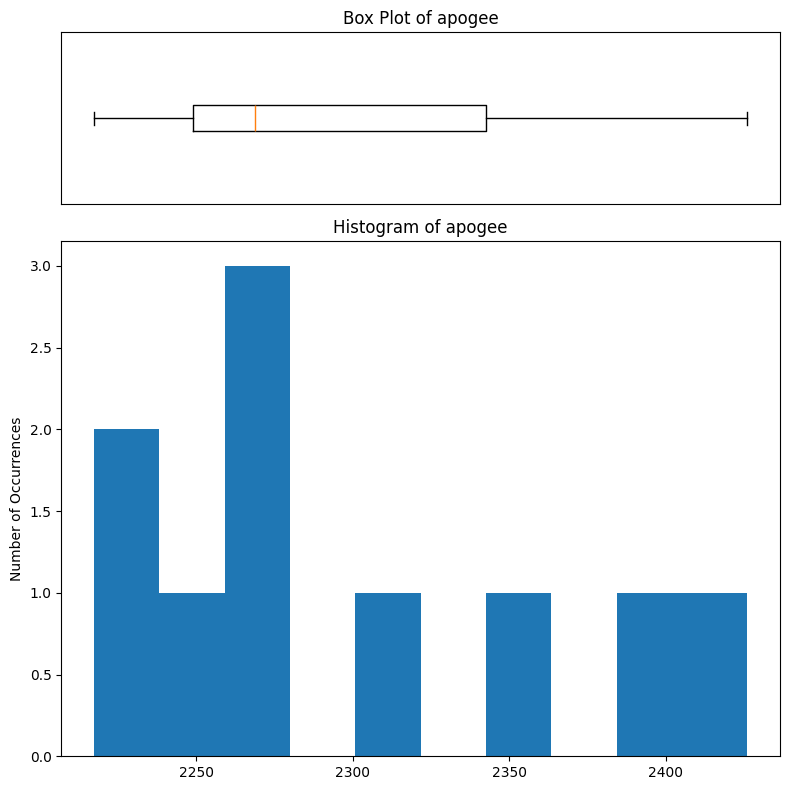

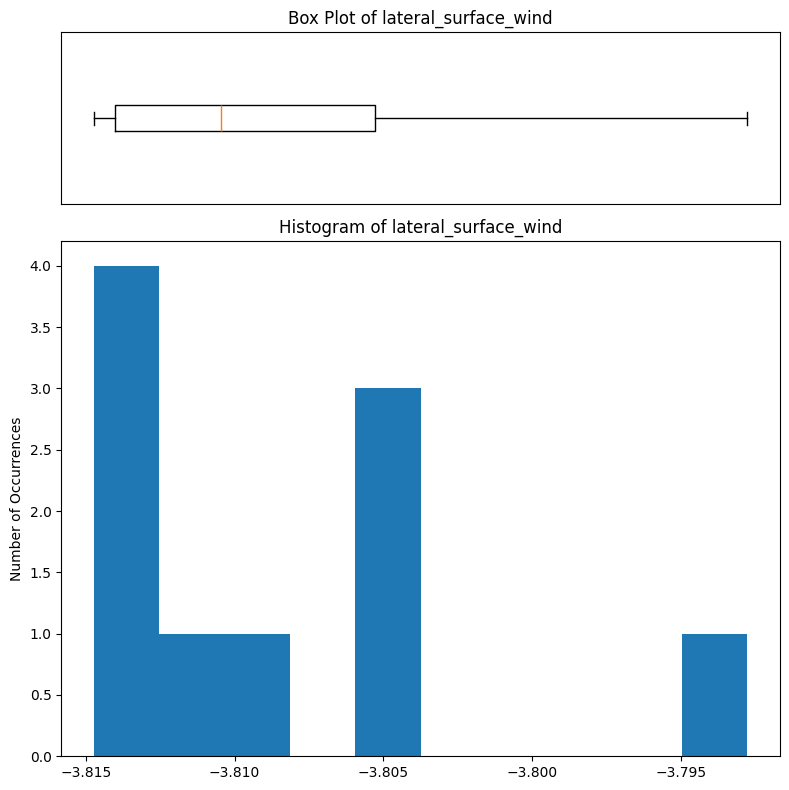

In [22]:
test_dispersion.plots.all()

## Google Earth file
Export data into a `.kml` file that can be opened in Google Earth

In [23]:
test_dispersion.export_ellipses_to_kml(
    filename="Monte_Carlo_results/monte_carlo_class_example.kml",
    origin_lon=-77.18899,
    origin_lat=42.692624,
    type="all",
)